d:\Projects\WasteClassification\Source\WasteClassificationAndLitteringBehaviorDetection\venv\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "




1/1 [==============================] - 1s 1s/step
Predictions for D:\Projects\WasteClassification\Source\WasteClassificationAndLitteringBehaviorDetection\data\images\test\inorganic\image_0_augmented_glass_bd3d608b8d1344a48c78a98f72d12f9a.jpg.png: [[1. 0.]]


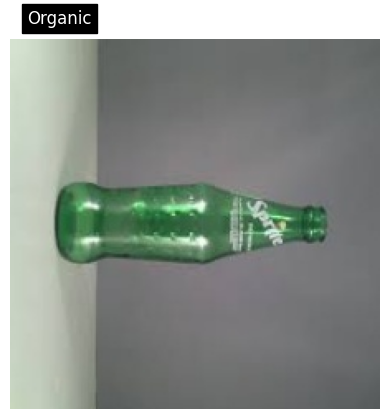

1/1 [==============================] - 1s 765ms/step
Predictions for D:\Projects\WasteClassification\Source\WasteClassificationAndLitteringBehaviorDetection\data\images\test\inorganic\image_1000_resized_plastic_4701b836907b43cda37336a3653555a1.jpg.png: [[1. 0.]]


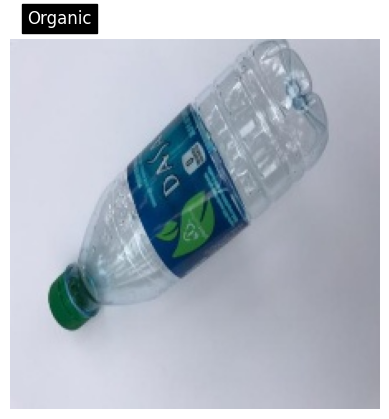

1/1 [==============================] - 1s 759ms/step
Predictions for D:\Projects\WasteClassification\Source\WasteClassificationAndLitteringBehaviorDetection\data\images\test\inorganic\image_1001_augmented_flipped_glass_6d0b72846f054425b9a971c5501e389c.jpg.png: [[1. 0.]]


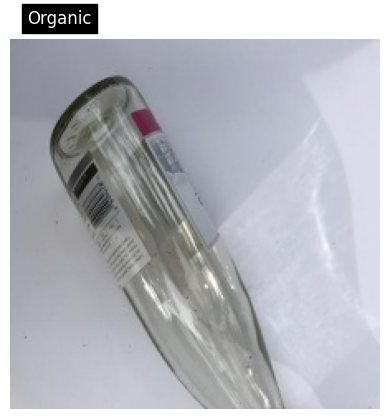

1/1 [==============================] - 1s 634ms/step
Predictions for D:\Projects\WasteClassification\Source\WasteClassificationAndLitteringBehaviorDetection\data\images\test\inorganic\image_1002_augmented_flipped_glass_b3aebd43c5dd4d7f9c33e2acb64dc8ef.jpg.png: [[1. 0.]]


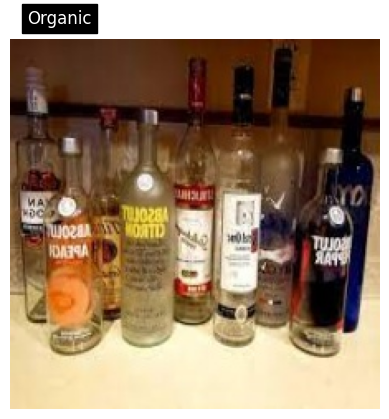

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Projects\\WasteClassification\\Source\\WasteClassificationAndLitteringBehaviorDetection\\data\\images\\test\\inorganic\\image_1003_resized_glass_c7ca0b2e885a476497fbdd3ec627041a.jpg.png'

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model_path = r'D:\Projects\WasteClassification\Source\WasteClassificationAndLitteringBehaviorDetection\src\models\classification_model\saved_model.h5'
test_images_dir = r'D:\Projects\WasteClassification\Source\WasteClassificationAndLitteringBehaviorDetection\data\images\test'

model = tf.keras.models.load_model(model_path)
labels = ['Vô cơ','Hữu cơ'] 

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    return predictions

def display_image(img_path, predictions):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off') # Không hiển thị trục
    
    # Lấy chỉ số của dự đoán cao nhất
    predicted_index = np.argmax(predictions)
    predicted_label = labels[predicted_index]
    
    # Hiển thị nhãn lên ảnh
    plt.text(10, -10, predicted_label, color='white', fontsize=12, backgroundcolor='black')
    
    plt.show()

# Duyệt qua tất cả các file trong thư mục test và các thư mục con của nó
for root, dirs, files in os.walk(test_images_dir):
    for img_name in files:
        img_path = os.path.join(root, img_name)
        # Kiểm tra nếu là file hình ảnh dựa trên đuôi file
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            predictions = predict_image(img_path, model)
            print(f"Predictions for {img_path}: {predictions}")
            display_image(img_path, predictions) # Cập nhật để hiển thị nhãn
            input("Press Enter to continue to the next image...") # Dừng chương trình và chờ nhấn Enter
        else:
            print(f"Skipping file: {img_path}")
